# **2000 SAMPLE IMAGES AND ITS HYPER PARAMETER TUNING**
This code is a experimental code where it contains the initial code file with we trained the model on  2000 samples and experimented using 100, 200, 500, and 700 epochs and Learning rate = 0.1, batch sizes = {8, 16, 50}

# DATASET LOAD
This part of code takes dataset directly from Kaggle and uses it for the project. This code block performs the necessary steps to access the dataset in Kagglehub.

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manishkumardk","key":"611a797d41679b76ca7a04d7cf6f02df"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install kagglehub


In [4]:
import kagglehub

path = kagglehub.dataset_download("soumikrakshit/nyu-depth-v2")
print("Path to dataset files:", path)


100%|██████████| 4.10G/4.10G [03:10<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soumikrakshit/nyu-depth-v2/versions/1


In [5]:
import os

# checks the folder where the dataset is present and trying to access it.
base_path = "/root/.cache/kagglehub/datasets/soumikrakshit/nyu-depth-v2/versions/1"
for root, dirs, files in os.walk(base_path):
    print("Folder", root)
    for file in files:
        print("   --", file)
    break


for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        print(f"Folder {item}/")
    else:
        print(f"File {item}")

data_path = os.path.join(base_path, "nyu_data/data")

for item in os.listdir(data_path):
    item_path = os.path.join(data_path, item)
    if os.path.isdir(item_path):
        print(f"Folder {item}/")
    else:
        print(f"File {item}")


Folder /root/.cache/kagglehub/datasets/soumikrakshit/nyu-depth-v2/versions/1
Folder nyu_data/
Folder nyu2_test/
Folder nyu2_train/
File nyu2_train.csv
File nyu2_test.csv


In [ ]:
import pandas as pd

csv_path = os.path.join(data_path, "nyu2_train.csv")
df = pd.read_csv(csv_path)

df.head()


,data/nyu2_train/living_room_0038_out/37.jpg,data/nyu2_train/living_room_0038_out/37.png
0,data/nyu2_train/living_room_0038_out/115.jpg,data/nyu2_train/living_room_0038_out/115.png
1,data/nyu2_train/living_room_0038_out/6.jpg,data/nyu2_train/living_room_0038_out/6.png
2,data/nyu2_train/living_room_0038_out/49.jpg,data/nyu2_train/living_room_0038_out/49.png
3,data/nyu2_train/living_room_0038_out/152.jpg,data/nyu2_train/living_room_0038_out/152.png
4,data/nyu2_train/living_room_0038_out/142.jpg,data/nyu2_train/living_room_0038_out/142.png


In [ ]:
!pip install pillow torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch

In [ ]:
import pandas as pd
csv_path = os.path.join(data_path, "nyu2_train.csv")
df = pd.read_csv(csv_path)
print(df.columns)


Index(['data/nyu2_train/living_room_0038_out/37.jpg', 'data/nyu2_train/living_room_0038_out/37.png'], dtype='object')


# **DATASET SAMPLE SIZE**
choosing 2000 sample to train the model.

In [ ]:
import pandas as pd
import os

data_path = os.path.join(base_path, "nyu_data/data")

csv_path = os.path.join(data_path, "nyu2_train.csv")
df = pd.read_csv(csv_path, header=None, names=["rgb", "depth"])


df["rgb"] = df["rgb"].str.replace("data/", "", regex=False)
df["depth"] = df["depth"].str.replace("data/", "", regex=False)

#choosing 2000 samples to train the model
sampled_df = df.sample(n=2000, random_state=42)


sampled_csv_path = os.path.join(data_path, "nyu2_train_sampled.csv")
sampled_df.to_csv(sampled_csv_path, index=False)


# BASELINE CODE WITH AND WITHOUT CHANGES
In the mentioned paper , they have used KITTI datasets where as we have used a lighter version of NYU Depth V2 Dataset which has RGB images paired with depth maps made available in the Kaggle.


In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import torch

class NYUDepthDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform_img=None, transform_depth=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform_img = transform_img
        self.transform_depth = transform_depth

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        depth_path = os.path.join(self.root_dir, self.data.iloc[idx, 1])

        image = Image.open(img_path).convert("RGB")
        depth = Image.open(depth_path).convert("L")

        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_depth:
            depth = self.transform_depth(depth)

        return image, depth


**TRANSFORMATIONS APPLIED TO THE INPUT IMAGES**

The functions image_transform and depth_transform to apply transformations the input images

In [ ]:
import torchvision.transforms as transforms

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

depth_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.float())
])


In [ ]:
from torch.utils.data import DataLoader


dataset = NYUDepthDataset(
    csv_file=sampled_csv_path,
    root_dir=data_path,
    transform_img=image_transform,
    transform_depth=depth_transform
)


dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


**PLOTING THE RGB AND DEPTH IMAGE**
The below code shows a sample of RGB and Depth image and displays it

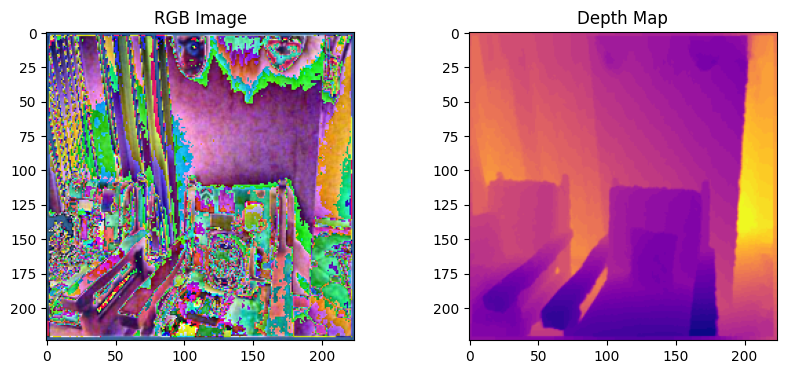

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

images, depths = next(iter(dataloader))

def show_sample(image, depth):
    image = F.to_pil_image(image.cpu())
    depth = depth.squeeze().cpu().numpy()

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("RGB Image")

    plt.subplot(1, 2, 2)
    plt.imshow(depth, cmap="plasma")
    plt.title("Depth Map")
    plt.show()


show_sample(images[0], depths[0])


**MODEL TRAINING**
The below code uses spatial attention class to focus on the significant spatial regions and the CNN module uses encoder and decoder module and then a forward pass is applied

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SpatialAttention(nn.Module):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)  # kernel size 7x7

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        concat = torch.cat([avg_out, max_out], dim=1)
        attention = torch.sigmoid(self.conv(concat))
        return x * attention


class CNNDepthEstimator(nn.Module):
    def __init__(self):
        super(CNNDepthEstimator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=2, padding=2),  # [B, 32, 112, 112]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            SpatialAttention(),

            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),  # [B, 64, 56, 56]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            SpatialAttention(),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # [B, 128, 28, 28]
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch.optim as optim


model = CNNDepthEstimator()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


criterion = nn.L1Loss()


optimizer = optim.Adam(model.parameters(), lr=1e-4)

print("Model, loss, and optimizer are ready.")


Model, loss, and optimizer are ready.


**MODEL TRAINING FUNCTION**

this code blocks defines a function to train the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time


criterion = nn.MSELoss()


optimizer = optim.Adam(model.parameters(), lr=1e-4)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


def train_model(model, dataloader, criterion, optimizer, device, num_epochs=5):
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        start_time = time.time()

        for batch_idx, (images, depths) in enumerate(dataloader):
            images = images.to(device)
            depths = depths.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, depths)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()


            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(dataloader)}], Loss: {loss.item():.4f}")

        avg_loss = epoch_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{num_epochs}] - Avg Loss: {avg_loss:.4f} - Time: {time.time() - start_time:.2f}s\n")

    print("Training completed.")

train_model(model, dataloader, criterion, optimizer, device, num_epochs=5)


Epoch [1/5], Batch [1/500], Loss: 0.0929
Epoch [1/5], Batch [2/500], Loss: 0.0707
Epoch [1/5], Batch [3/500], Loss: 0.0616
Epoch [1/5], Batch [4/500], Loss: 0.0611
Epoch [1/5], Batch [5/500], Loss: 0.0637
Epoch [1/5], Batch [6/500], Loss: 0.0539
Epoch [1/5], Batch [7/500], Loss: 0.0704
Epoch [1/5], Batch [8/500], Loss: 0.0444
Epoch [1/5], Batch [9/500], Loss: 0.0573
Epoch [1/5], Batch [10/500], Loss: 0.0603
Epoch [1/5], Batch [11/500], Loss: 0.0711
Epoch [1/5], Batch [12/500], Loss: 0.0429
Epoch [1/5], Batch [13/500], Loss: 0.0520
Epoch [1/5], Batch [14/500], Loss: 0.0513
Epoch [1/5], Batch [15/500], Loss: 0.0356
Epoch [1/5], Batch [16/500], Loss: 0.0451
Epoch [1/5], Batch [17/500], Loss: 0.0412
Epoch [1/5], Batch [18/500], Loss: 0.0409
Epoch [1/5], Batch [19/500], Loss: 0.0461
Epoch [1/5], Batch [20/500], Loss: 0.0551
Epoch [1/5], Batch [21/500], Loss: 0.0408
Epoch [1/5], Batch [22/500], Loss: 0.0299
Epoch [1/5], Batch [23/500], Loss: 0.0350
Epoch [1/5], Batch [24/500], Loss: 0.0414
E

**MODEL EVALUATION**

This code evaluates the model and shows the input RGB and Depth image and the predicted output of this

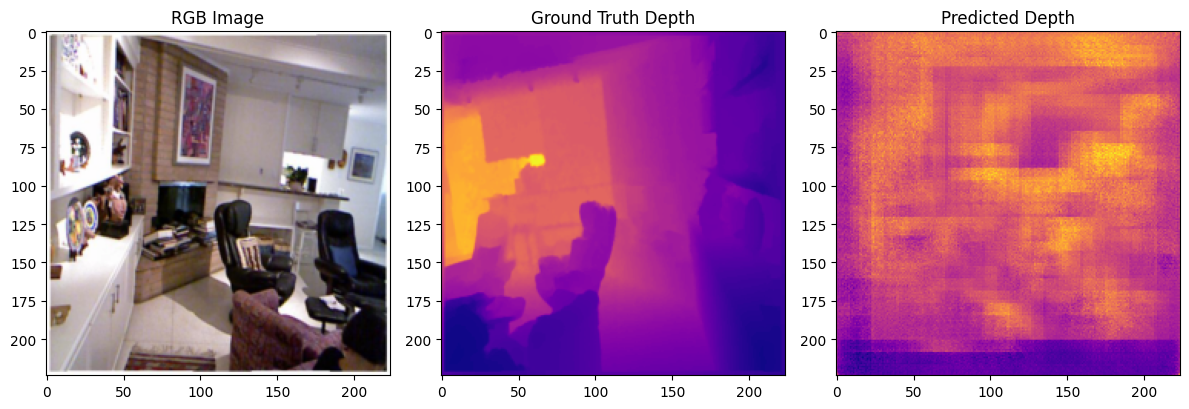

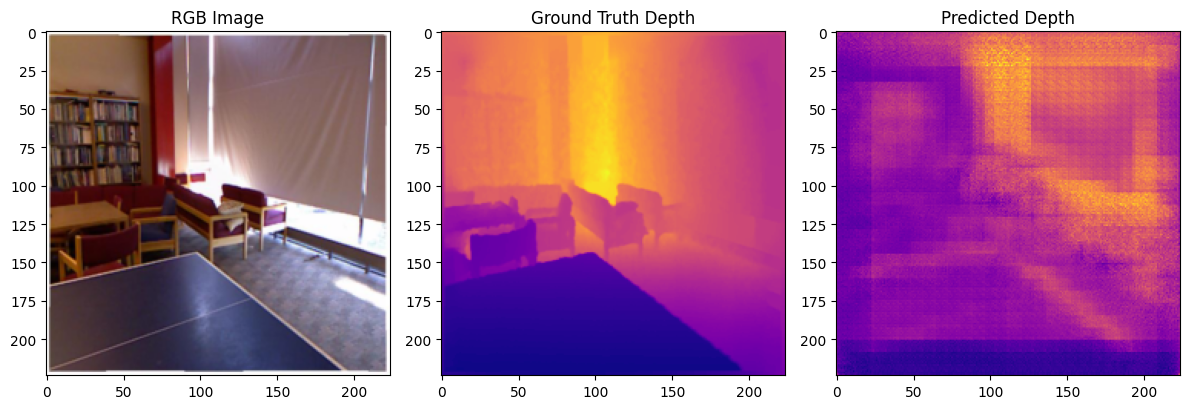

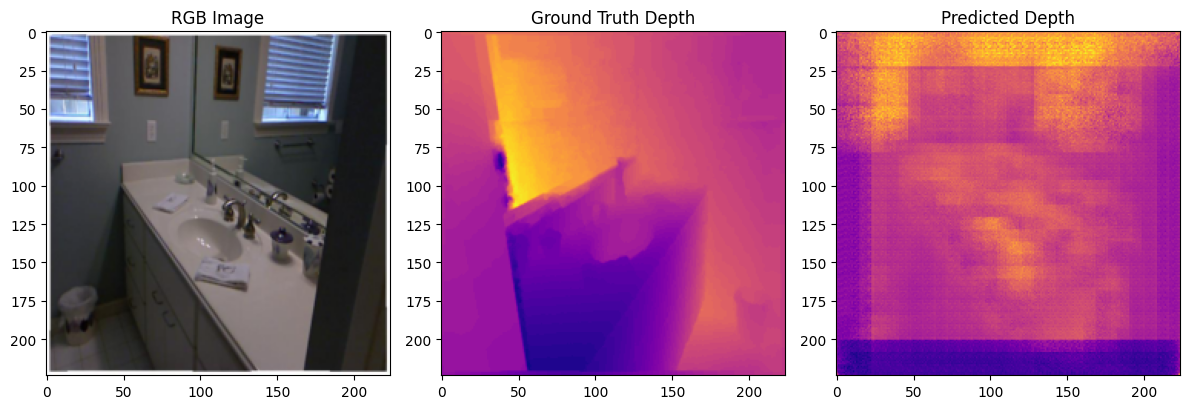

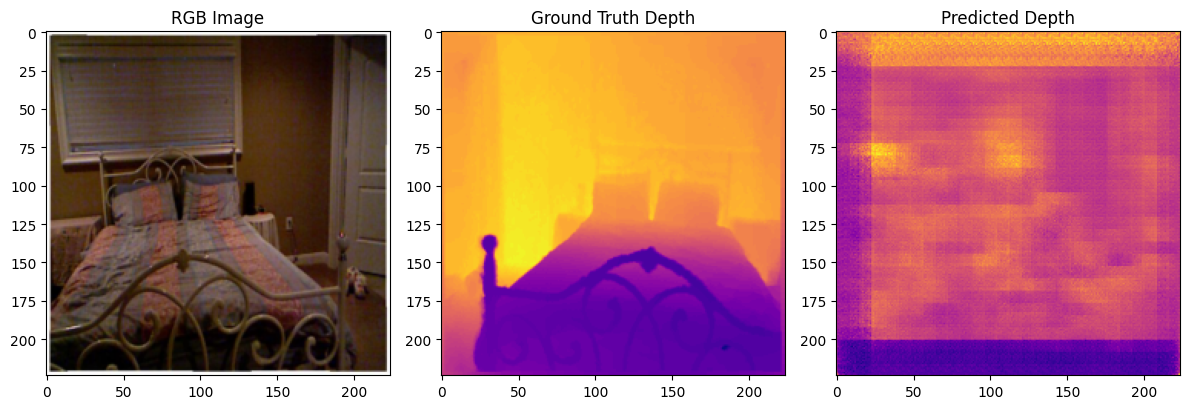

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import torch


def unnormalize(img_tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    return img_tensor * std + mean

model.eval()


images, true_depths = next(iter(dataloader))
images = images.to(device)
true_depths = true_depths.to(device)


with torch.no_grad():
    predicted_depths = model(images)


images = images.cpu()
true_depths = true_depths.cpu()
predicted_depths = predicted_depths.cpu()


for i in range(4):
    unnorm_img = unnormalize(images[i])
    rgb = TF.to_pil_image(torch.clamp(unnorm_img, 0, 1))  # clamp to avoid values <0 or >1
    true_depth = true_depths[i].squeeze().numpy()
    pred_depth = predicted_depths[i].squeeze().numpy()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(rgb)
    plt.title("RGB Image")

    plt.subplot(1, 3, 2)
    plt.imshow(true_depth, cmap="plasma")
    plt.title("Ground Truth Depth")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_depth, cmap="plasma")
    plt.title("Predicted Depth")

    plt.tight_layout()
    plt.show()


# **HYPERPARAMETER TUNING**
Even though we tried various batch sizes ={8,16,50} and epochs=100,200,500,700 and Learing Rate as 0.1 but since the model only trained only on 2000 samples it started to overfit so we used another file to train the model on 10,000 samples.

In [ ]:
from torch.utils.data import random_split


train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


**BATCH SIZE(8,16) and EPOCHES (100,200)**

In [ ]:
import time

batch_sizes = [8, 16]
optimizers = ['adam', 'sgd']
epoch_list = [100, 200]
learning_rate = 0.1

print("Running Batch Sizes 8 & 16 for 100 & 200 Epochs...\n")

for epochs in epoch_list:
    for bs in batch_sizes:
        for opt in optimizers:
            print(f"\n Config: Epochs={epochs}, Batch={bs}, Optimizer={opt}")
            start_time = time.time()

            train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=0, pin_memory=True)
            val_loader = DataLoader(val_dataset, batch_size=bs, num_workers=0, pin_memory=True)

            model = CNNDepthEstimator().to(device)
            criterion = torch.nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) if opt == 'adam' else torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
            early_stopper = EarlyStopping(patience=10)

            for epoch in range(epochs):

                model.train()
                train_loss, train_acc = 0, 0
                for x, y in train_loader:
                    x, y = x.to(device), y.to(device)
                    optimizer.zero_grad()
                    out = model(x)
                    loss = criterion(out, y)
                    acc = compute_threshold_accuracy(out, y)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                    train_acc += acc
                avg_train_loss = train_loss / len(train_loader)
                avg_train_acc = train_acc / len(train_loader)


                model.eval()
                val_loss, val_acc = 0, 0
                with torch.no_grad():
                    for x, y in val_loader:
                        x, y = x.to(device), y.to(device)
                        out = model(x)
                        val_loss += criterion(out, y).item()
                        val_acc += compute_threshold_accuracy(out, y)
                avg_val_loss = val_loss / len(val_loader)
                avg_val_acc = val_acc / len(val_loader)

                if (epoch + 1) % 20 == 0 or epoch == 0:
                    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.3f} | Val Loss: {avg_val_loss:.4f}, Acc: {avg_val_acc:.3f}")

                early_stopper(avg_val_loss, model)
                if early_stopper.early_stop:
                    print(f" Early stopped at epoch {epoch+1}")
                    break

            if early_stopper.best_model:
                model.load_state_dict(early_stopper.best_model)

            duration = time.time() - start_time
            print(f" Finished in {duration:.2f} seconds")


Running Batch Sizes 8 & 16 for 100 & 200 Epochs...


 Config: Epochs=100, Batch=8, Optimizer=adam
Epoch 1/100 - Train Loss: 0.0263, Acc: 0.511 | Val Loss: 0.0238, Acc: 0.500
 Early stopped at epoch 11
 Finished in 197.44 seconds

 Config: Epochs=100, Batch=8, Optimizer=sgd
Epoch 1/100 - Train Loss: 0.0272, Acc: 0.515 | Val Loss: 0.0222, Acc: 0.547
Epoch 20/100 - Train Loss: 0.0189, Acc: 0.598 | Val Loss: 0.0197, Acc: 0.612
Epoch 40/100 - Train Loss: 0.0183, Acc: 0.611 | Val Loss: 0.0211, Acc: 0.631
 Early stopped at epoch 43
 Finished in 766.72 seconds

 Config: Epochs=100, Batch=16, Optimizer=adam
Epoch 1/100 - Train Loss: 0.0326, Acc: 0.466 | Val Loss: 0.0764, Acc: 0.201
 Early stopped at epoch 13
 Finished in 224.48 seconds

 Config: Epochs=100, Batch=16, Optimizer=sgd
Epoch 1/100 - Train Loss: 0.0338, Acc: 0.497 | Val Loss: 0.0237, Acc: 0.534
Epoch 20/100 - Train Loss: 0.0193, Acc: 0.593 | Val Loss: 0.0198, Acc: 0.606
 Early stopped at epoch 34
 Finished in 588.46 seconds

 Config:

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b3a1cd8ade0>
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7b3a1cd8ade0>  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    
Traceback (most recent call last):
self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():
   
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
      if w.is_alive(): 
 ^^^ ^ ^^ ^^^  ^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
     ^^^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^^ ^  ^ ^      ^ ^^
^  File "/us

 Early stopped at epoch 64
 Finished in 1111.88 seconds


**TRYING BATCH SIZE 50 AND EPOCHES (500,700)**


In [ ]:
batch_sizes = [50]
optimizers = ['adam', 'sgd']
epoch_list = [500, 700]
learning_rate = 0.1

print("\n Running Batch Size 50 for 500 & 700 Epochs...\n")

for epochs in epoch_list:
    for bs in batch_sizes:
        for opt in optimizers:
            print(f"\n Config: Epochs={epochs}, Batch={bs}, Optimizer={opt}")
            start_time = time.time()

            train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True, num_workers=0, pin_memory=True)
            val_loader = DataLoader(val_dataset, batch_size=bs, num_workers=0, pin_memory=True)

            model = CNNDepthEstimator().to(device)
            criterion = torch.nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) if opt == 'adam' else torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
            early_stopper = EarlyStopping(patience=15)

            for epoch in range(epochs):

                model.train()
                train_loss, train_acc = 0, 0
                for x, y in train_loader:
                    x, y = x.to(device), y.to(device)
                    optimizer.zero_grad()
                    out = model(x)
                    loss = criterion(out, y)
                    acc = compute_threshold_accuracy(out, y)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                    train_acc += acc
                avg_train_loss = train_loss / len(train_loader)
                avg_train_acc = train_acc / len(train_loader)


                model.eval()
                val_loss, val_acc = 0, 0
                with torch.no_grad():
                    for x, y in val_loader:
                        x, y = x.to(device), y.to(device)
                        out = model(x)
                        val_loss += criterion(out, y).item()
                        val_acc += compute_threshold_accuracy(out, y)
                avg_val_loss = val_loss / len(val_loader)
                avg_val_acc = val_acc / len(val_loader)

                if (epoch + 1) % 50 == 0 or epoch == 0:
                    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Acc: {avg_train_acc:.3f} | Val Loss: {avg_val_loss:.4f}, Acc: {avg_val_acc:.3f}")

                early_stopper(avg_val_loss, model)
                if early_stopper.early_stop:
                    print(f"Early stopped at epoch {epoch+1}")
                    break

            if early_stopper.best_model:
                model.load_state_dict(early_stopper.best_model)

            duration = time.time() - start_time
            print(f"Finished in {duration:.2f} seconds")



 Running Batch Size 50 for 500 & 700 Epochs...


 Config: Epochs=500, Batch=50, Optimizer=adam
Epoch 1/500 - Train Loss: 0.0339, Acc: 0.470 | Val Loss: 0.0269, Acc: 0.481
Epoch 50/500 - Train Loss: 0.0194, Acc: 0.593 | Val Loss: 0.0205, Acc: 0.613
Epoch 100/500 - Train Loss: 0.0185, Acc: 0.605 | Val Loss: 0.0194, Acc: 0.579
Early stopped at epoch 107
Finished in 1793.51 seconds

 Config: Epochs=500, Batch=50, Optimizer=sgd
Epoch 1/500 - Train Loss: 0.0481, Acc: 0.440 | Val Loss: 0.0260, Acc: 0.504
Epoch 50/500 - Train Loss: 0.0183, Acc: 0.612 | Val Loss: 0.0197, Acc: 0.555
Early stopped at epoch 81
Finished in 1361.13 seconds

 Config: Epochs=700, Batch=50, Optimizer=adam
Epoch 1/700 - Train Loss: 0.0402, Acc: 0.447 | Val Loss: 0.0321, Acc: 0.422
Early stopped at epoch 18
Finished in 299.93 seconds

 Config: Epochs=700, Batch=50, Optimizer=sgd
Epoch 1/700 - Train Loss: 0.0354, Acc: 0.473 | Val Loss: 0.0259, Acc: 0.454
Epoch 50/700 - Train Loss: 0.0189, Acc: 0.598 | Val Loss: 0.0191, A